#Multiple Disease Prediction project

In [54]:
#pk=parkinsons

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import plotly.express as px

In [56]:
pk=pd.read_csv(r"C:\Users\kishore\Downloads\parkinsons - parkinsons.csv")

In [57]:
pk

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [58]:
pk.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [59]:
pk.duplicated().sum()

0

In [60]:
pk.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [61]:
pk=pk.rename(columns={'MDVP:Fo(Hz)':'mdvp:fo(hz)', 'MDVP:Fhi(Hz)':'mdvp:fhi(hz)', 'MDVP:Flo(Hz)':'mdvp:flo(hz)', 'MDVP:Jitter(%)':'mdvp:jitter(%)',
       'MDVP:Jitter(Abs)':'mdvp:jitter(abs)', 'MDVP:RAP':'mdvp:rap', 'MDVP:PPQ':'mdvp:ppq', 'Jitter:DDP':'jitter:ddp',
       'MDVP:Shimmer':'mdvp:shimmer', 'MDVP:Shimmer(dB)':'mdvp:shimmer(db)', 'Shimmer:APQ3':'shimmer:apq3', 'Shimmer:APQ5':'shimmer:apq5',
       'MDVP:APQ':'mdvp:apq', 'Shimmer:DDA':'shimmer:dda', 'NHR':'nhr', 'HNR':'hnr', 'RPDE':'rpde', 'DFA':'dfa',
       'D2':'d2', 'PPE':'ppe'})

In [62]:
pk.columns

Index(['name', 'mdvp:fo(hz)', 'mdvp:fhi(hz)', 'mdvp:flo(hz)', 'mdvp:jitter(%)',
       'mdvp:jitter(abs)', 'mdvp:rap', 'mdvp:ppq', 'jitter:ddp',
       'mdvp:shimmer', 'mdvp:shimmer(db)', 'shimmer:apq3', 'shimmer:apq5',
       'mdvp:apq', 'shimmer:dda', 'nhr', 'hnr', 'status', 'rpde', 'dfa',
       'spread1', 'spread2', 'd2', 'ppe'],
      dtype='object')

In [63]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   mdvp:fo(hz)       195 non-null    float64
 2   mdvp:fhi(hz)      195 non-null    float64
 3   mdvp:flo(hz)      195 non-null    float64
 4   mdvp:jitter(%)    195 non-null    float64
 5   mdvp:jitter(abs)  195 non-null    float64
 6   mdvp:rap          195 non-null    float64
 7   mdvp:ppq          195 non-null    float64
 8   jitter:ddp        195 non-null    float64
 9   mdvp:shimmer      195 non-null    float64
 10  mdvp:shimmer(db)  195 non-null    float64
 11  shimmer:apq3      195 non-null    float64
 12  shimmer:apq5      195 non-null    float64
 13  mdvp:apq          195 non-null    float64
 14  shimmer:dda       195 non-null    float64
 15  nhr               195 non-null    float64
 16  hnr               195 non-null    float64
 1

In [64]:
pk.drop(['name'],axis=1,inplace=True)

C:\Users\kishore\AppData\Local\Temp\ipykernel_20388\318903672.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=pk, palette='viridis')


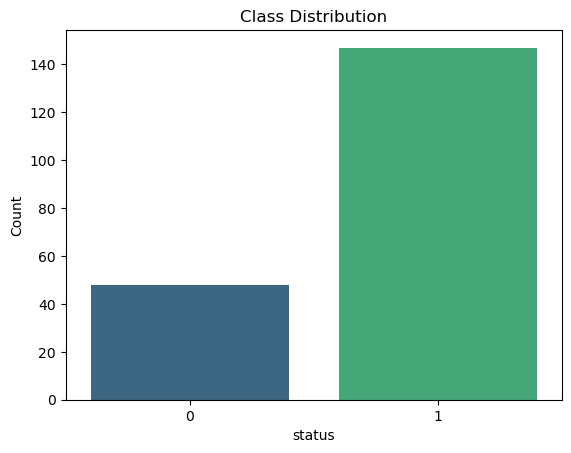

In [65]:
# Plot class distribution
sns.countplot(x='status', data=pk, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('status')
plt.ylabel('Count')
plt.show()

In [66]:
pk.corr()

,mdvp:fo(hz),mdvp:fhi(hz),mdvp:flo(hz),mdvp:jitter(%),mdvp:jitter(abs),mdvp:rap,mdvp:ppq,jitter:ddp,mdvp:shimmer,mdvp:shimmer(db),...,shimmer:dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
mdvp:fo(hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
mdvp:fhi(hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
mdvp:flo(hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
mdvp:jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
mdvp:jitter(abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
mdvp:rap,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
mdvp:ppq,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
jitter:ddp,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
mdvp:shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
mdvp:shimmer(db),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

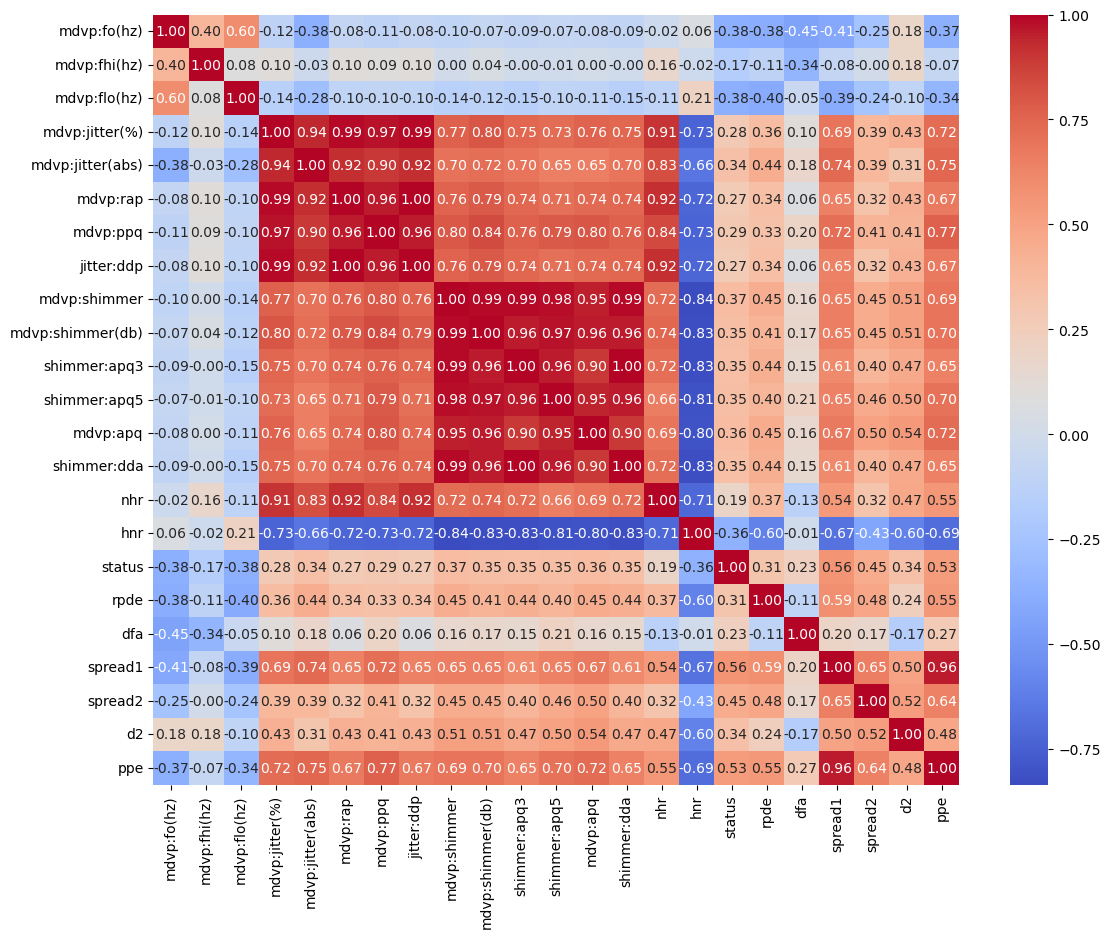

In [67]:
plt.figure(figsize=(13, 10))
sns.heatmap(pk.corr(),annot=True, cmap='coolwarm',fmt='.2f')

In [68]:
# compare above there is no less impact columns

In [69]:
x=pk.drop(['status'],axis=1)
y=pk['status']

In [70]:
pk['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((156, 22), (39, 22), (156,), (39,))

In [72]:
pk.shape

(195, 23)

In [73]:
y_train.value_counts()

status
1    118
0     38
Name: count, dtype: int64

In [74]:
y_test.value_counts()

status
1    29
0    10
Name: count, dtype: int64

In [75]:
from sklearn.metrics import classification_report

In [ ]:
pip install lazypredict --quiet

In [77]:
from lazypredict.Supervised import LazyClassifier

In [78]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier and evaluate
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

# Print the model performance summary
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:06<00:00,  5.06it/s]

[LightGBM] [Info] Number of positive: 118, number of negative: 38
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.756410 -> initscore=1.133098
[LightGBM] [Info] Start training from score 1.133098
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [79]:
from sklearn.neighbors import KNeighborsClassifier
model1=KNeighborsClassifier().fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.82      0.93      0.87        29

    accuracy                           0.79        39
   macro avg       0.74      0.67      0.69        39
weighted avg       0.78      0.79      0.78        39



In [80]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier().fit(x_train,y_train)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39



In [81]:
import pickle

In [82]:
pickle.dump(model,open("parkinsons.pkl","wb"))

In [83]:
#kd=kidney_disease

In [102]:
kd=pd.read_csv(r"C:\Users\kishore\Downloads\kidney_disease - kidney_disease.csv")

In [104]:
pd.set_option('display.max_columns',None)

In [106]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,NaN,normal,notpresent,notpresent,121.00,36.00,1.20,NaN,NaN,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,NaN,normal,notpresent,notpresent,NaN,18.00,0.80,NaN,NaN,11.30,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,NaN,NaN,9.60,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,NaN,NaN,11.60,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,140.00,49.00,0.50,150.00,4.90,15.70,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,75.00,31.00,1.20,141.00,3.50,16.50,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,100.00,26.00,0.60,137.00,4.40,15.80,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,114.00,50.00,1.00,135.00,4.90,14.20,51,7200,5.9,no,no,no,good,no,no,notckd


In [108]:
kd.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [110]:
kd.duplicated().sum()

0

In [112]:
kd.fillna(method='bfill',inplace=True)

In [114]:
kd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [116]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,normal,normal,notpresent,notpresent,121.00,36.00,1.20,111.00,2.50,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,normal,normal,notpresent,notpresent,423.00,18.00,0.80,111.00,2.50,11.30,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,111.00,2.50,9.60,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,142.00,3.20,11.60,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,140.00,49.00,0.50,150.00,4.90,15.70,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,75.00,31.00,1.20,141.00,3.50,16.50,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,100.00,26.00,0.60,137.00,4.40,15.80,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,114.00,50.00,1.00,135.00,4.90,14.20,51,7200,5.9,no,no,no,good,no,no,notckd


In [118]:
for i in kd.select_dtypes(include='object').columns:
  print(i,kd[i].unique())

rbc ['normal' 'abnormal']
pc ['normal' 'abnormal']
pcc ['notpresent' 'present']
ba ['notpresent' 'present']
pcv ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '?' '52' '14' '22' '18' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '47' '9' '49' '50' '53' '51' '54']
wc ['7800' '6000' '7500' '6700' '7300' '6900' '9600' '12100' '4500' '12200'
 '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300' '9800'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '7100' '11800' '9400' '5500' '5800' '13200' '12500'
 '5600' '7000' '11900' '10400' '10700' '12700' '6800' '6500' '13600'
 '10200' '9000' '14900' '8200' '15200' '5000' '16300' '12400' '10500'
 '4200' '4700' '10900' '8100' '9500' '2200' '12800' '11200' '19100' '?'
 '12300' '16700' '2600' '26400' '8800' '7400' '4900' '8000' '12000'
 '15700' '4100' '5700' '11500' '5400' '10800' '9900' '5200' '5900' '9300'
 '9700' '5100' '660

In [120]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.00,80.00,1.02,1.00,0.00,normal,normal,notpresent,notpresent,121.00,36.00,1.20,111.00,2.50,15.40,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.00,50.00,1.02,4.00,0.00,normal,normal,notpresent,notpresent,423.00,18.00,0.80,111.00,2.50,11.30,38,6000,3.9,no,no,no,good,no,no,ckd
2,2,62.00,80.00,1.01,2.00,3.00,normal,normal,notpresent,notpresent,423.00,53.00,1.80,111.00,2.50,9.60,31,7500,3.9,no,yes,no,poor,no,yes,ckd
3,3,48.00,70.00,1.00,4.00,0.00,normal,abnormal,present,notpresent,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.00,80.00,1.01,2.00,0.00,normal,normal,notpresent,notpresent,106.00,26.00,1.40,142.00,3.20,11.60,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,140.00,49.00,0.50,150.00,4.90,15.70,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.00,70.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,75.00,31.00,1.20,141.00,3.50,16.50,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.00,80.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,100.00,26.00,0.60,137.00,4.40,15.80,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.00,60.00,1.02,0.00,0.00,normal,normal,notpresent,notpresent,114.00,50.00,1.00,135.00,4.90,14.20,51,7200,5.9,no,no,no,good,no,no,notckd


In [122]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [124]:
kd['pcv'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', '16',
       '24', '37', '30', '34', '40', '45', '27', '48', '?', '52', '14',
       '22', '18', '42', '17', '46', '23', '19', '25', '41', '26', '15',
       '21', '43', '20', '47', '9', '49', '50', '53', '51', '54'],
      dtype=object)

In [126]:
kd.replace('?', pd.NA, inplace=True)

In [128]:
kd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               1
wc                1
rc                1
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [130]:
kd.bfill(inplace=True)

In [132]:
kd.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [134]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [136]:
kd['pcv']=kd['pcv'].astype('int64')
kd['wc']=kd['wc'].astype('int64')
kd['rc']=kd['rc'].astype('float64')
kd.drop(['id'],axis=1,inplace=True)

In [138]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    object 
 6   pc              400 non-null    object 
 7   pcc             400 non-null    object 
 8   ba              400 non-null    object 
 9   bgr             400 non-null    float64
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    flo

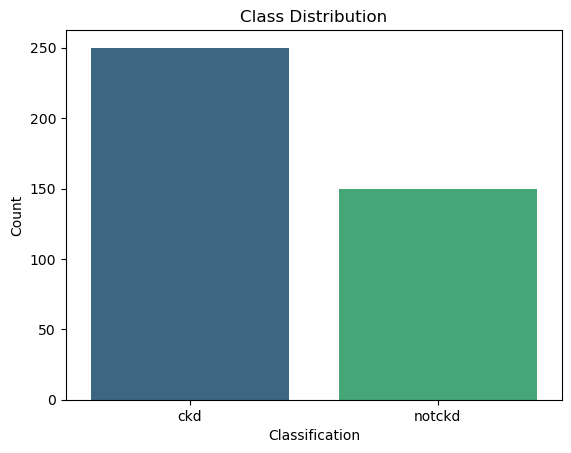

In [140]:
# Plot class distribution
sns.countplot(x='classification', data=kd, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

In [142]:
from sklearn.preprocessing import OrdinalEncoder

In [144]:
encode=OrdinalEncoder()

In [146]:
for i in kd.select_dtypes(include='object').columns:
  kd[i]=encode.fit_transform(kd[[i]])

In [148]:
kd

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.00,80.00,1.02,1.00,0.00,1.00,1.00,0.00,0.00,121.00,36.00,1.20,111.00,2.50,15.40,44,7800,5.20,1.00,1.00,0.00,0.00,0.00,0.00,0.00
1,7.00,50.00,1.02,4.00,0.00,1.00,1.00,0.00,0.00,423.00,18.00,0.80,111.00,2.50,11.30,38,6000,3.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,62.00,80.00,1.01,2.00,3.00,1.00,1.00,0.00,0.00,423.00,53.00,1.80,111.00,2.50,9.60,31,7500,3.90,0.00,1.00,0.00,1.00,0.00,1.00,0.00
3,48.00,70.00,1.00,4.00,0.00,1.00,0.00,1.00,0.00,117.00,56.00,3.80,111.00,2.50,11.20,32,6700,3.90,1.00,0.00,0.00,1.00,1.00,1.00,0.00
4,51.00,80.00,1.01,2.00,0.00,1.00,1.00,0.00,0.00,106.00,26.00,1.40,142.00,3.20,11.60,35,7300,4.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,140.00,49.00,0.50,150.00,4.90,15.70,47,6700,4.90,0.00,0.00,0.00,0.00,0.00,0.00,1.00
396,42.00,70.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,75.00,31.00,1.20,141.00,3.50,16.50,54,7800,6.20,0.00,0.00,0.00,0.00,0.00,0.00,1.00
397,12.00,80.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,100.00,26.00,0.60,137.00,4.40,15.80,49,6600,5.40,0.00,0.00,0.00,0.00,0.00,0.00,1.00
398,17.00,60.00,1.02,0.00,0.00,1.00,1.00,0.00,0.00,114.00,50.00,1.00,135.00,4.90,14.20,51,7200,5.90,0.00,0.00,0.00,0.00,0.00,0.00,1.00


In [150]:
kd.corr()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.00,0.16,-0.21,0.13,0.20,-0.08,-0.13,0.16,0.04,0.20,0.19,0.12,-0.07,0.05,-0.20,-0.24,0.12,-0.15,0.40,0.37,0.23,0.15,0.09,0.06,-0.24
bp,0.16,1.00,-0.17,0.13,0.23,-0.24,-0.18,0.06,0.11,0.15,0.19,0.15,-0.13,0.07,-0.27,-0.28,-0.01,-0.19,0.28,0.24,0.09,0.18,0.08,0.21,-0.29
sg,-0.21,-0.17,1.00,-0.44,-0.30,0.33,0.36,-0.26,-0.20,-0.30,-0.28,-0.16,0.22,-0.04,0.57,0.55,-0.21,0.47,-0.38,-0.43,-0.16,-0.22,-0.29,-0.22,0.72
al,0.13,0.13,-0.44,1.00,0.25,-0.25,-0.50,0.36,0.33,0.29,0.45,0.32,-0.34,0.09,-0.57,-0.54,0.20,-0.48,0.51,0.39,0.30,0.31,0.44,0.33,-0.60
su,0.20,0.23,-0.30,0.25,1.00,-0.16,-0.21,0.12,0.09,0.49,0.19,0.13,-0.11,0.15,-0.25,-0.26,0.18,-0.23,0.31,0.49,0.23,0.07,0.14,0.12,-0.34
rbc,-0.08,-0.24,0.33,-0.25,-0.16,1.00,0.29,-0.08,-0.06,-0.15,-0.14,-0.13,0.13,0.05,0.37,0.33,-0.03,0.30,-0.21,-0.24,-0.16,-0.19,-0.15,-0.16,0.45
pc,-0.13,-0.18,0.36,-0.50,-0.21,0.29,1.00,-0.44,-0.28,-0.23,-0.37,-0.29,0.24,-0.12,0.45,0.44,-0.09,0.39,-0.34,-0.28,-0.19,-0.26,-0.34,-0.26,0.43
pcc,0.16,0.06,-0.26,0.36,0.12,-0.08,-0.44,1.00,0.28,0.16,0.18,0.05,-0.15,-0.02,-0.25,-0.27,0.16,-0.25,0.20,0.17,0.19,0.19,0.10,0.18,-0.27
ba,0.04,0.11,-0.20,0.33,0.09,-0.06,-0.28,0.28,1.00,0.09,0.16,0.05,-0.07,-0.00,-0.17,-0.17,0.06,-0.16,0.09,0.08,0.16,0.15,0.13,0.05,-0.19
bgr,0.20,0.15,-0.30,0.29,0.49,-0.15,-0.23,0.16,0.09,1.00,0.13,0.07,-0.19,0.04,-0.29,-0.28,0.06,-0.18,0.35,0.50,0.18,0.19,0.12,0.13,-0.39


In [152]:
x1=kd.drop(['classification'],axis=1)
y1=kd['classification']

In [154]:
y1

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
      ... 
395   1.00
396   1.00
397   1.00
398   1.00
399   1.00
Name: classification, Length: 400, dtype: float64

In [156]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.1,random_state=350)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((360, 24), (40, 24), (360,), (40,))

In [158]:
from sklearn.metrics import classification_report

In [160]:
from lazypredict.Supervised import LazyClassifier

In [162]:
clf2 = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier and evaluate
model2, predictions = clf2.fit(x_train, x_test, y_train, y_test)

# Print the model performance summary
print(model2)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 15.24it/s]

[LightGBM] [Info] Number of positive: 132, number of negative: 228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 603
[LightGBM] [Info] Number of data points in the train set: 360, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.366667 -> initscore=-0.546544
[LightGBM] [Info] Start training from score -0.546544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [163]:
from sklearn.ensemble import AdaBoostClassifier
model2= AdaBoostClassifier().fit(x_train,y_train)
y_pred=model2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        22
         1.0       1.00      1.00      1.00        18

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [166]:
pickle.dump(model2,open("kidney_disease.pkl","wb"))

In [176]:
#ilp=indian_liver_patient

In [178]:
ilp=pd.read_csv(r"C:\Users\kishore\Downloads\indian_liver_patient - indian_liver_patient.csv")

In [180]:
ilp

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.70,0.10,187,16,18,6.80,3.30,0.90,1
1,62,Male,10.90,5.50,699,64,100,7.50,3.20,0.74,1
2,62,Male,7.30,4.10,490,60,68,7.00,3.30,0.89,1
3,58,Male,1.00,0.40,182,14,20,6.80,3.40,1.00,1
4,72,Male,3.90,2.00,195,27,59,7.30,2.40,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.50,0.10,500,20,34,5.90,1.60,0.37,2
579,40,Male,0.60,0.10,98,35,31,6.00,3.20,1.10,1
580,52,Male,0.80,0.20,245,48,49,6.40,3.20,1.00,1
581,31,Male,1.30,0.50,184,29,32,6.80,3.40,1.00,1


In [182]:
ilp.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [184]:
null_row=ilp[ilp['Albumin_and_Globulin_Ratio'].isnull()]
null_row

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,Female,0.90,0.30,189,23,33,6.60,3.90,NaN,1
241,51,Male,0.80,0.20,230,24,46,6.50,3.10,NaN,1
253,35,Female,0.60,0.20,180,12,15,5.20,2.70,NaN,2
312,27,Male,1.30,0.60,106,25,54,8.50,4.80,NaN,2


In [186]:
ilp['Albumin_and_Globulin_Ratio'].fillna(method='bfill',inplace=True)

In [188]:
ilp.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [190]:
ilp.duplicated().sum()

13

In [192]:
ilp.drop_duplicates(inplace=True)

In [194]:
ilp.duplicated().sum()

0

In [196]:
ilp.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [198]:
ilp=ilp.rename(columns={'Age':'age', 'Gender':'gender', 'Total_Bilirubin':'total_bilirubin', 'Direct_Bilirubin':'direct_bilirubin',
       'Alkaline_Phosphotase':'alkaline_phosphotase', 'Alamine_Aminotransferase':'alamine_aminotransferase',
       'Aspartate_Aminotransferase':'aspartate_aminotransferase', 'Total_Protiens':'total_protiens', 'Albumin':'albumin',
       'Albumin_and_Globulin_Ratio':'albumin_and_globulin_ratio', 'Dataset':'dataset'})

In [200]:
ilp.columns

Index(['age', 'gender', 'total_bilirubin', 'direct_bilirubin',
       'alkaline_phosphotase', 'alamine_aminotransferase',
       'aspartate_aminotransferase', 'total_protiens', 'albumin',
       'albumin_and_globulin_ratio', 'dataset'],
      dtype='object')

In [202]:
ilp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         570 non-null    int64  
 1   gender                      570 non-null    object 
 2   total_bilirubin             570 non-null    float64
 3   direct_bilirubin            570 non-null    float64
 4   alkaline_phosphotase        570 non-null    int64  
 5   alamine_aminotransferase    570 non-null    int64  
 6   aspartate_aminotransferase  570 non-null    int64  
 7   total_protiens              570 non-null    float64
 8   albumin                     570 non-null    float64
 9   albumin_and_globulin_ratio  570 non-null    float64
 10  dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


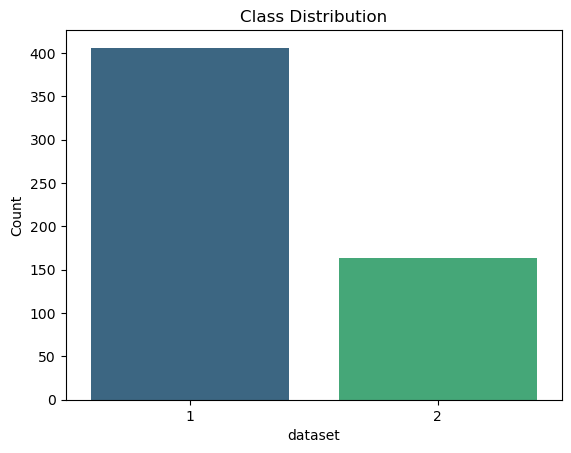

In [204]:
# Plot class distribution
sns.countplot(x='dataset', data=ilp, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('dataset')
plt.ylabel('Count')
plt.show()

In [206]:
from sklearn.preprocessing import OrdinalEncoder

In [208]:
encode=OrdinalEncoder()

In [210]:
for i in ilp.select_dtypes(include='object').columns:
  ilp[i]=encode.fit_transform(ilp[[i]])

In [212]:
ilp

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
0,65,0.00,0.70,0.10,187,16,18,6.80,3.30,0.90,1
1,62,1.00,10.90,5.50,699,64,100,7.50,3.20,0.74,1
2,62,1.00,7.30,4.10,490,60,68,7.00,3.30,0.89,1
3,58,1.00,1.00,0.40,182,14,20,6.80,3.40,1.00,1
4,72,1.00,3.90,2.00,195,27,59,7.30,2.40,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1.00,0.50,0.10,500,20,34,5.90,1.60,0.37,2
579,40,1.00,0.60,0.10,98,35,31,6.00,3.20,1.10,1
580,52,1.00,0.80,0.20,245,48,49,6.40,3.20,1.00,1
581,31,1.00,1.30,0.50,184,29,32,6.80,3.40,1.00,1


In [215]:
ilp.corr()

,age,gender,total_bilirubin,direct_bilirubin,alkaline_phosphotase,alamine_aminotransferase,aspartate_aminotransferase,total_protiens,albumin,albumin_and_globulin_ratio,dataset
age,1.00,0.06,0.01,0.01,0.08,-0.08,-0.02,-0.20,-0.27,-0.22,-0.14
gender,0.06,1.00,0.09,0.10,-0.02,0.08,0.08,-0.09,-0.09,-0.01,-0.08
total_bilirubin,0.01,0.09,1.00,0.87,0.21,0.22,0.24,-0.01,-0.22,-0.21,-0.22
direct_bilirubin,0.01,0.10,0.87,1.00,0.23,0.24,0.26,-0.00,-0.23,-0.20,-0.25
alkaline_phosphotase,0.08,-0.02,0.21,0.23,1.00,0.13,0.17,-0.03,-0.17,-0.24,-0.19
alamine_aminotransferase,-0.08,0.08,0.22,0.24,0.13,1.00,0.79,-0.04,-0.03,-0.01,-0.16
aspartate_aminotransferase,-0.02,0.08,0.24,0.26,0.17,0.79,1.00,-0.02,-0.09,-0.07,-0.15
total_protiens,-0.20,-0.09,-0.01,-0.00,-0.03,-0.04,-0.02,1.00,0.78,0.23,0.04
albumin,-0.27,-0.09,-0.22,-0.23,-0.17,-0.03,-0.09,0.78,1.00,0.69,0.17
albumin_and_globulin_ratio,-0.22,-0.01,-0.21,-0.20,-0.24,-0.01,-0.07,0.23,0.69,1.00,0.17


In [217]:
x=ilp.drop(['dataset'],axis=1)
y=ilp['dataset']

In [219]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((456, 10), (114, 10), (456,), (114,))

In [221]:
from sklearn.metrics import classification_report

In [223]:
from lazypredict.Supervised import LazyClassifier

In [225]:
clf3= LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit the LazyClassifier and evaluate
model3, predictions = clf3.fit(x_train, x_test, y_train, y_test)

# Print the model performance summary
print(model3)

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:02<00:00, 14.28it/s]

[LightGBM] [Info] Number of positive: 133, number of negative: 323
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 549
[LightGBM] [Info] Number of data points in the train set: 456, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.291667 -> initscore=-0.887303
[LightGBM] [Info] Start training from score -0.887303
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [226]:
#ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model3=ExtraTreesClassifier().fit(x_train,y_train)
y_pred=model3.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.83      0.80        83
           2       0.44      0.35      0.39        31

    accuracy                           0.70       114
   macro avg       0.61      0.59      0.60       114
weighted avg       0.68      0.70      0.69       114



In [229]:
pickle.dump(model3,open("indian_liver_patient.pkl","wb"))